# characters 金庸小说数据分析

In [21]:
from __future__ import unicode_literals
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt 

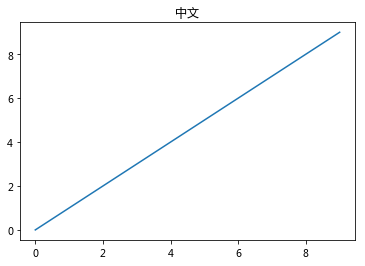

In [23]:
x = range(10)
plt.plot(x)
plt.title("中文")
plt.show()

In [24]:
with open("novels/鹿鼎记.txt",encoding="utf-8")as f:
    data = f.readlines()
for line in data[:3]:
    print(line)
    

﻿第一回 纵横钩党清流祸 峭茜风期月旦评

　　

　　北风如刀，满地冰霜。



In [3]:
with open("novels/name.txt",encoding="utf-8")as f:
    data = [line.strip() for line in f.readlines()]
    novels = data[::2]
    names = data[1::2]
    novel_names = {k:v.split() for k,v in zip(novels,names)}
for name in novel_names['天龙八部'][:20]:
    print(name)

刀白凤
丁春秋
马夫人
马五德
小翠
于光豪
巴天石
不平道人
邓百川
风波恶
甘宝宝
公冶乾
木婉清
少林老僧
太皇太后
天狼子
天山童姥
王语嫣
乌老大
无崖子


## characters 寻找主角光环

### 出场次数越多，主角光环越强

In [76]:
def find_main_character(novel,num=10):
    with open("novels/{}.txt".format(novel),encoding="utf-8")as f:
        context = f.read()
    count = []
    for name in novel_names[novel]:
        count.append([name, context.count(name)])
    count.sort(key=lambda x: x[1],reverse=True)
#     print(count[:10][::-1])
    names = [item[0] for item in count[:num][::-1]]
    counts = [item[1] for item in count[:num][::-1]]
    _,ax = plt.subplots()
    
    ax.barh(range(num), counts, color='red', align='center')
    ax.set_title(novel, fontsize=14)
    ax.set_yticks(range(num))
    ax.set_yticklabels(names, fontsize=14)


        

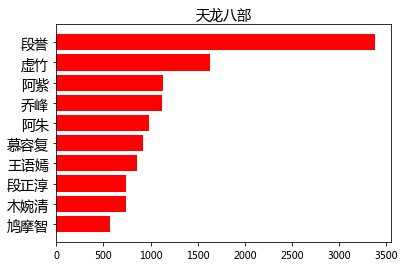

In [79]:
find_main_character("天龙八部")
plt.show()

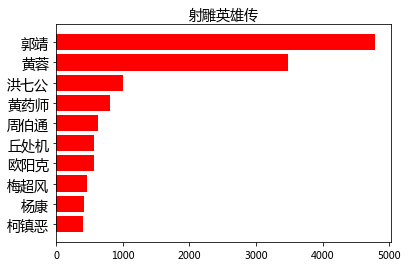

In [81]:
find_main_character("射雕英雄传")
plt.show()

## Word2Vec分析

In [1]:
import jieba

In [8]:
for novel,names in novel_names.items():
    for name in names:
        jieba.add_word(name)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\unicom\AppData\Local\Temp\jieba.cache
Loading model cost 0.893 seconds.
Prefix dict has been built succesfully.
